# Project-01

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the datasets
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [5]:
# Displaying the first few rows of the training dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

### Data Exploration

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [11]:
# Fill missing 'Age' values with the median of each class
train['Age'] = train['Age'].fillna(train.groupby('Pclass')['Age'].transform('median'))
test['Age'] = test['Age'].fillna(test.groupby('Pclass')['Age'].transform('median'))

In [12]:
# Drop 'Cabin' column as it has too many missing values
train = train.drop(columns=['Cabin'])
test = test.drop(columns=['Cabin'])

In [13]:
train['Fare'] = train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'))
test['Fare'] = test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'))

In [14]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [15]:
# Fill missing 'Embarked' values with the mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)

<ipython-input-15-b289171b115c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
<ipython-input-15-b289171b115c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

### Encoding Categorical Features

In [16]:
# Encoding 'Sex': Male -> 0, Female -> 1
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

# Encoding 'Embarked' using one-hot encoding
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Embarked'], drop_first=True)

In [17]:
# Creating a 'FamilySize' feature
train['FamilySize'] = train['SibSp'] + train['Parch']
test['FamilySize'] = test['SibSp'] + test['Parch']

## EDA

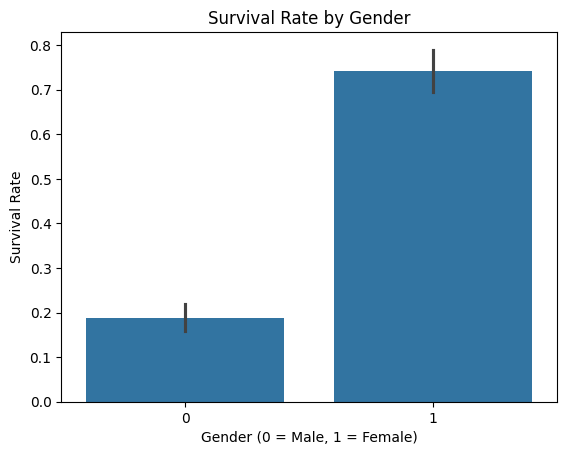

In [18]:
# Plotting survival rate by gender
sns.barplot(x='Sex', y='Survived', data=train)
plt.title("Survival Rate by Gender")
plt.xlabel("Gender (0 = Male, 1 = Female)")
plt.ylabel("Survival Rate")
plt.show()

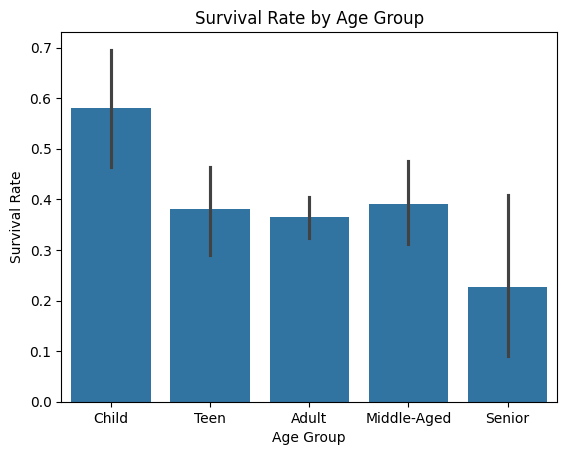

In [19]:
# Plotting survival rate by age groups
age_bins = [0, 12, 20, 40, 60, 80]
train['AgeGroup'] = pd.cut(train['Age'], bins=age_bins, labels=['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior'])
sns.barplot(x='AgeGroup', y='Survived', data=train)
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.show()

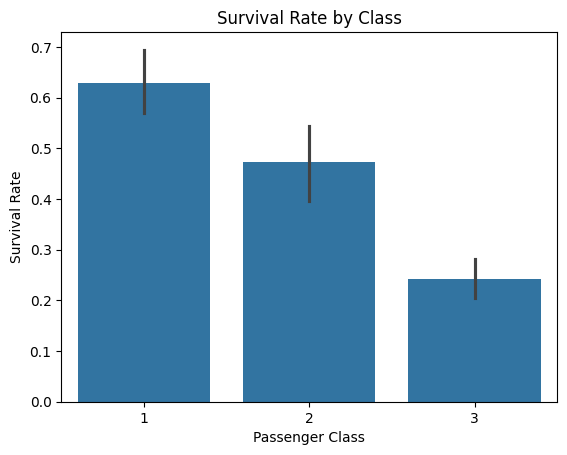

In [20]:
# Plotting survival rate by class
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title("Survival Rate by Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

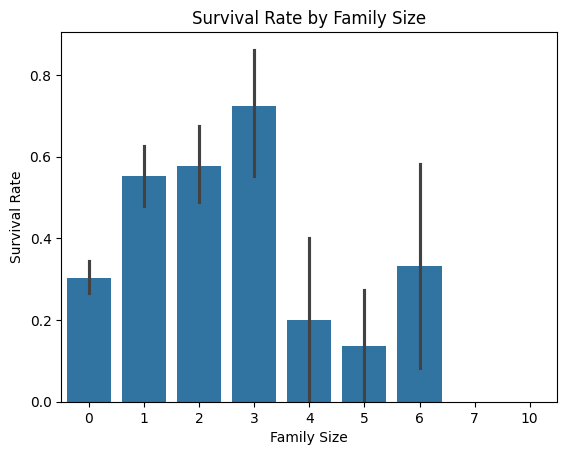

In [21]:
# Plotting survival rate by family size
sns.barplot(x='FamilySize', y='Survived', data=train)
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.show()

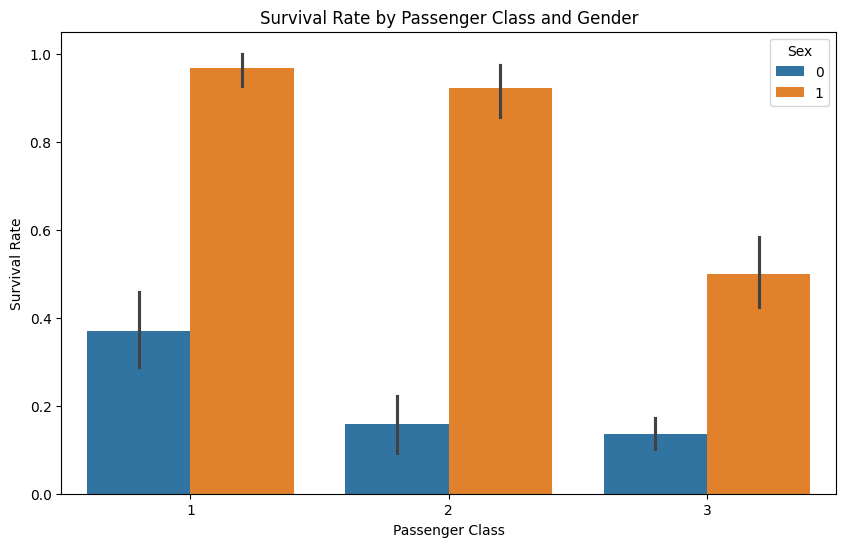

In [25]:
# Plotting survival rate by Pclass and Sex
plt.figure(figsize=(10, 6))
sns.barplot(data=train, x="Pclass", y="Survived", hue="Sex")
plt.title("Survival Rate by Passenger Class and Gender")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.legend(title="Sex", loc="upper right")
plt.show()

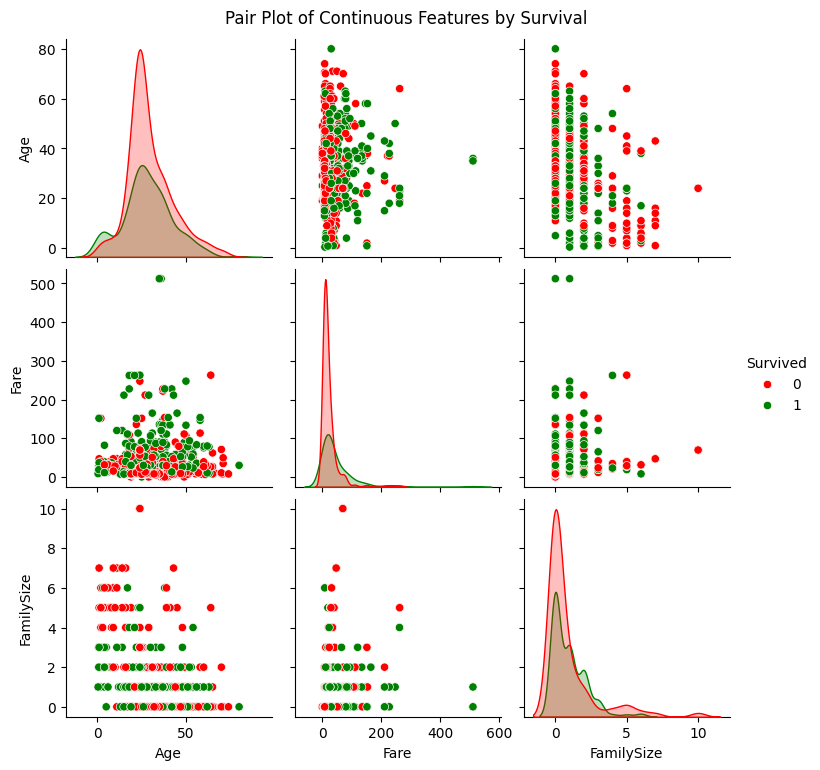

In [27]:
# Selecting continuous variables
continuous_features = ['Age', 'Fare', 'FamilySize', 'Survived']

# Pair plot to visualize relationships
sns.pairplot(train[continuous_features], hue='Survived', palette={0: "red", 1: "green"})
plt.suptitle("Pair Plot of Continuous Features by Survival", y=1.02)
plt.show()


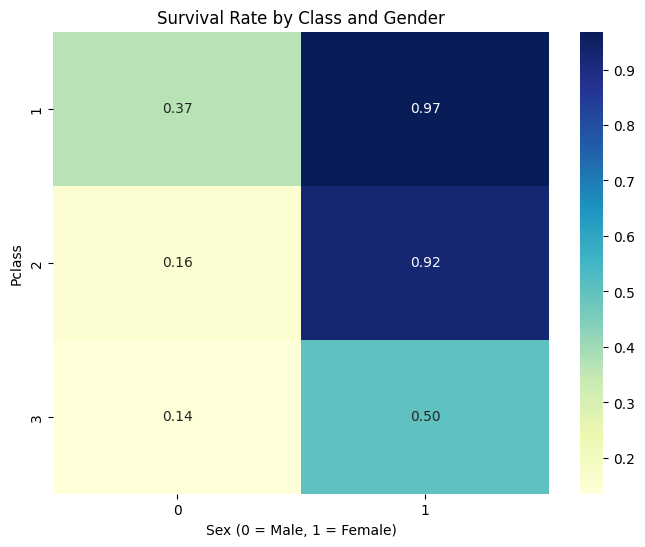

In [28]:
# Pivot table for heatmap visualization
pivot = train.pivot_table(index='Pclass', columns='Sex', values='Survived', aggfunc='mean')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Survival Rate by Class and Gender")
plt.xlabel("Sex (0 = Male, 1 = Female)")
plt.ylabel("Pclass")
plt.show()
